In [1]:
import math, sys, functools, os, codecs
import importlib  
from glob import glob
import sqlite3
import numpy as np
import numpy.random as rd
from numpy import matrix
import pandas as pd
import scipy as sp
from scipy import stats as st
from datetime import  datetime as dt
from collections import Counter
from itertools import chain
import multiprocessing as mp
from distutils.version import LooseVersion

import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
plt.rcParams["patch.force_edgecolor"] = True
#rc('text', usetex=True)
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]
%matplotlib inline

%config InlineBackend.figure_format='retina'
# OS判別 ======================
flag_win32 = False
try:
    os.uname()
except AttributeError:
    flag_win32 = True

# Mac用フォント設定
# if not flag_win32:
#     font_path = '/Library/Fonts/Osaka.ttc'
#     font_prop = font_manager.FontProperties(fname=font_path)
#     matplotlib.rcParams['font.family'] = font_prop.get_name()
#     plt.rcParams['font.family'] = 'Osaka'


def current_time():
    return dt.strftime(dt.now(),'%Y-%m-%d %H:%M:%S')
    
from sklearn.preprocessing import StandardScaler

In [2]:
# 身長体重データセット
X = [[172.13, 63.94],
    [183.87, 85.54],
    [179.54, 80.94],
    [173.62, 72.99],
    [167.83, 62.86],
    [174.38, 75.47],
    [171.38, 68.83],
    [171.1, 68.51],
    [169.39, 66.44],
    [174.26, 74.05],
    [171.87, 70.40],
    [163.64, 57.51],
    [166.51, 60.41],
    [159.39, 51.34],
    [167.17, 62.03],
    [168.36, 61.11],
    [161.17, 55.65],
    [169.75, 67.04],
    [179.97, 62.40],
    [166.95, 60.61]]
X = np.array(X)

In [3]:
# 標準化
sc = StandardScaler()
X = sc.fit_transform(X)

In [4]:

# 特異値分解実行
U, d, V = np.linalg.svd(X, full_matrices=False)
#D = np.diag([d[i] if i<len(d) else 0 for i in range(X.shape[0])])
D = np.diag(d)

In [5]:
#
d2 = d**2
svd_explained_variance_ratio_ = d2/np.sum(d2)
svd_explained_variance_ratio_

array([ 0.93211384,  0.06788616])

In [6]:
print(U.shape)
print(np.linalg.matrix_rank(U))
U

(20, 2)
2


array([[ 0.00501404,  0.23769237],
       [-0.52714703, -0.03739248],
       [-0.37813008, -0.11104447],
       [-0.15107986, -0.12535459],
       [ 0.10403566, -0.01688004],
       [-0.20071369, -0.19942593],
       [-0.04899986, -0.07085501],
       [-0.03904726, -0.07444531],
       [ 0.02335897, -0.09035307],
       [-0.17844082, -0.13423842],
       [-0.08059428, -0.11710587],
       [ 0.26084998, -0.04140436],
       [ 0.1641699 ,  0.01516148],
       [ 0.43034481, -0.0276134 ],
       [ 0.12855817, -0.02140471],
       [ 0.11826398,  0.11244544],
       [ 0.3351305 , -0.12315778],
       [ 0.00791579, -0.09554528],
       [-0.12627023,  0.8843653 ],
       [ 0.1527813 ,  0.03655612]])

In [7]:
print(D.shape)
print(np.linalg.matrix_rank(D))
D

(2, 2)
2


array([[ 6.1061079 ,  0.        ],
       [ 0.        ,  1.64786114]])

In [8]:
print(V.shape)
print(np.linalg.matrix_rank(V))
V

(2, 2)
2


array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

# 次元削減による近似を行わないフルバージョン

In [9]:
print(U.shape, D.shape, V.shape)
UD = np.dot(U, D)

(20, 2) (2, 2) (2, 2)


In [10]:
X_hat_full = np.dot(UD,V)
X_hat_full

array([[ 0.25531343, -0.29861141],
       [ 2.23247683,  2.31961729],
       [ 1.50325047,  1.76203155],
       [ 0.50624814,  0.79837793],
       [-0.46886055, -0.42952284],
       [ 0.63424168,  1.09898937],
       [ 0.12900402,  0.29412648],
       [ 0.0818485 ,  0.25533791],
       [-0.20613697,  0.00442432],
       [ 0.61403218,  0.92686508],
       [ 0.21152617,  0.48443292],
       [-1.17450916, -1.0780193 ],
       [-0.69116513, -0.72649786],
       [-1.89026252, -1.82591148],
       [-0.58001284, -0.5301307 ],
       [-0.3796019 , -0.64164785],
       [-1.59048817, -1.30347788],
       [-0.14550845,  0.0771529 ],
       [ 1.57566786, -0.48528142],
       [-0.6170636 , -0.702255  ]])

In [11]:
df_full_compared = pd.DataFrame(np.c_[sc.inverse_transform(X), sc.inverse_transform(X_hat_full)], columns=["height_original", "weight_original", "height_reduced", "weight_reduced"])
df_full_compared["height_diff"] = df_full_compared.apply(lambda x: x.height_original - x.height_reduced, axis=1)
df_full_compared["weight_diff"] = df_full_compared.apply(lambda x: x.weight_original - x.weight_reduced, axis=1)
df_full_compared

,height_original,weight_original,height_reduced,weight_reduced,height_diff,weight_diff
0,172.13,63.94,172.13,63.94,0.0,-1.421085e-14
1,183.87,85.54,183.87,85.54,0.0,-1.421085e-14
2,179.54,80.94,179.54,80.94,0.0,0.000000e+00
3,173.62,72.99,173.62,72.99,0.0,0.000000e+00
4,167.83,62.86,167.83,62.86,0.0,0.000000e+00
5,174.38,75.47,174.38,75.47,0.0,0.000000e+00
6,171.38,68.83,171.38,68.83,0.0,0.000000e+00
7,171.10,68.51,171.10,68.51,0.0,0.000000e+00
8,169.39,66.44,169.39,66.44,0.0,0.000000e+00
9,174.26,74.05,174.26,74.05,0.0,0.000000e+00


Text(0.5,1,'weight, dim=full')

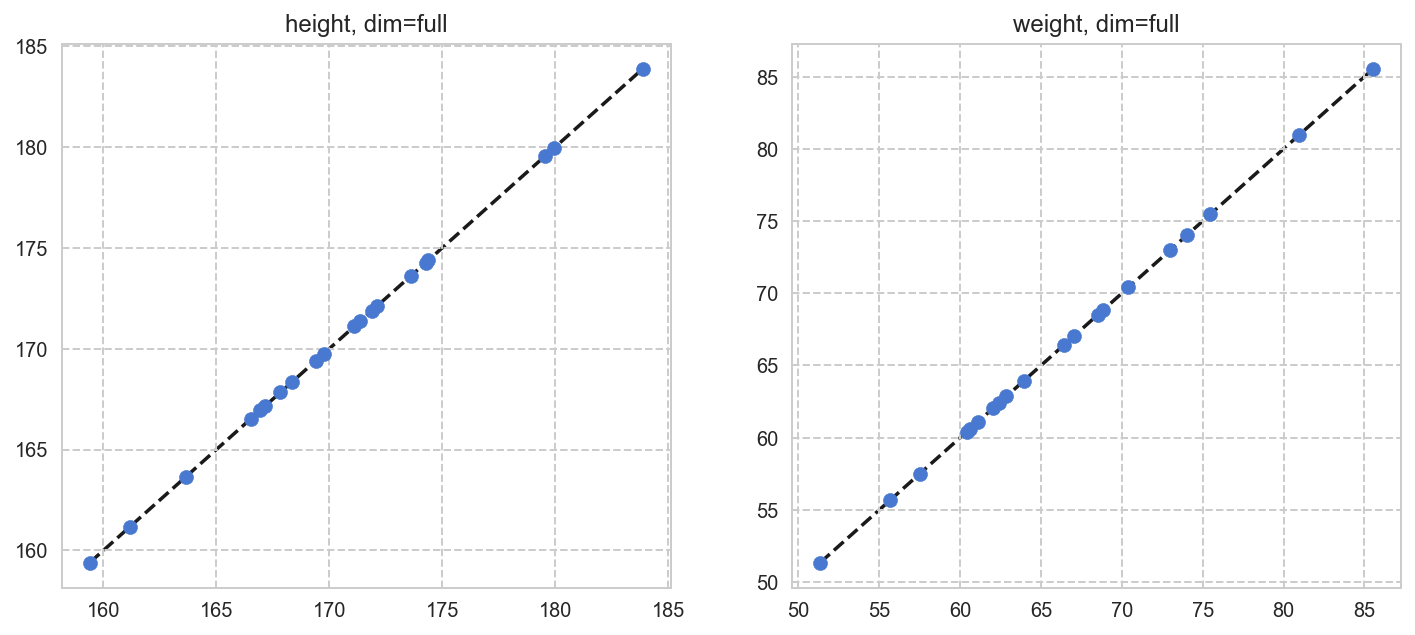

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(df_full_compared.height_original, df_full_compared.height_reduced)
_min = np.min([df_full_compared.height_original, df_full_compared.height_reduced])
_max = np.max([df_full_compared.height_original, df_full_compared.height_reduced])
plt.plot([_min,_max],[_min, _max], "k--", zorder=-1)
plt.title("height, dim=full")

plt.subplot(122)
plt.scatter(df_full_compared.weight_original, df_full_compared.weight_reduced)
_min = np.min([df_full_compared.weight_original, df_full_compared.weight_reduced])
_max = np.max([df_full_compared.weight_original, df_full_compared.weight_reduced])
plt.plot([_min,_max],[_min, _max], "k--", zorder=-1)
plt.title("weight, dim=full")



# 近似を実施。(次元を2から1に落とす)

In [13]:
dim = 1
#UD = np.dot(U, D)[:, :len(d)]

In [14]:
U[:,:dim]

array([[ 0.00501404],
       [-0.52714703],
       [-0.37813008],
       [-0.15107986],
       [ 0.10403566],
       [-0.20071369],
       [-0.04899986],
       [-0.03904726],
       [ 0.02335897],
       [-0.17844082],
       [-0.08059428],
       [ 0.26084998],
       [ 0.1641699 ],
       [ 0.43034481],
       [ 0.12855817],
       [ 0.11826398],
       [ 0.3351305 ],
       [ 0.00791579],
       [-0.12627023],
       [ 0.1527813 ]])

In [15]:
d[:dim]

array([ 6.1061079])

In [16]:
UD_dim1 = np.dot(U[:,:dim],d[:dim])
UD_dim1

array([ 0.03061629, -3.21881662, -2.30890305, -0.92250994,  0.63525299,
       -1.22557943, -0.29919844, -0.23842679,  0.14263238, -1.0895789 ,
       -0.49211739,  1.59277815,  1.00243911,  2.62773183,  0.78499003,
        0.72213262,  2.04634302,  0.04833467, -0.77101965,  0.93289913])

In [17]:
V_dim1 = V[:dim]
V_dim1

array([[-0.70710678, -0.70710678]])

In [18]:
print(UD_dim1[:,np.newaxis].shape, V_dim1.shape)

(20, 1) (1, 2)


In [19]:
print(UD_dim1[:,np.newaxis].shape, V_dim1.shape)
X_hat_reduced = np.dot(UD_dim1[:,np.newaxis], V_dim1)
X_hat_reduced

(20, 1) (1, 2)


array([[-0.02164899, -0.02164899],
       [ 2.27604706,  2.27604706],
       [ 1.63264101,  1.63264101],
       [ 0.65231304,  0.65231304],
       [-0.4491917 , -0.4491917 ],
       [ 0.86661553,  0.86661553],
       [ 0.21156525,  0.21156525],
       [ 0.1685932 ,  0.1685932 ],
       [-0.10085632, -0.10085632],
       [ 0.77044863,  0.77044863],
       [ 0.34797954,  0.34797954],
       [-1.12626423, -1.12626423],
       [-0.70883149, -0.70883149],
       [-1.858087  , -1.858087  ],
       [-0.55507177, -0.55507177],
       [-0.51062488, -0.51062488],
       [-1.44698303, -1.44698303],
       [-0.03417778, -0.03417778],
       [ 0.54519322,  0.54519322],
       [-0.6596593 , -0.6596593 ]])

In [20]:
df_reduced_compared = pd.DataFrame(np.c_[sc.inverse_transform(X), sc.inverse_transform(X_hat_reduced)], columns=["height_original", "weight_original", "height_reduced", "weight_reduced"])
df_reduced_compared["height_diff"] = df_reduced_compared.apply(lambda x: x.height_original - x.height_reduced, axis=1)
df_reduced_compared["weight_diff"] = df_reduced_compared.apply(lambda x: x.weight_original - x.weight_reduced, axis=1)
df_reduced_compared

,height_original,weight_original,height_reduced,weight_reduced,height_diff,weight_diff
0,172.13,63.94,170.485453,66.224899,1.644547,-2.284899
1,183.87,85.54,184.128711,85.180552,-0.258711,0.359448
2,179.54,80.94,180.308295,79.872547,-0.768295,1.067453
3,173.62,72.99,174.487304,71.784986,-0.867304,1.205014
4,167.83,62.86,167.946790,62.697735,-0.116790,0.162265
5,174.38,75.47,175.759789,73.552950,-1.379789,1.917050
6,171.38,68.83,171.870232,68.148882,-0.490232,0.681118
7,171.10,68.51,171.615073,67.794369,-0.515073,0.715631
8,169.39,66.44,170.015135,65.571450,-0.625135,0.868550
9,174.26,74.05,175.188770,72.759587,-0.928770,1.290413


Text(0.5,1,'weight, dim=1')

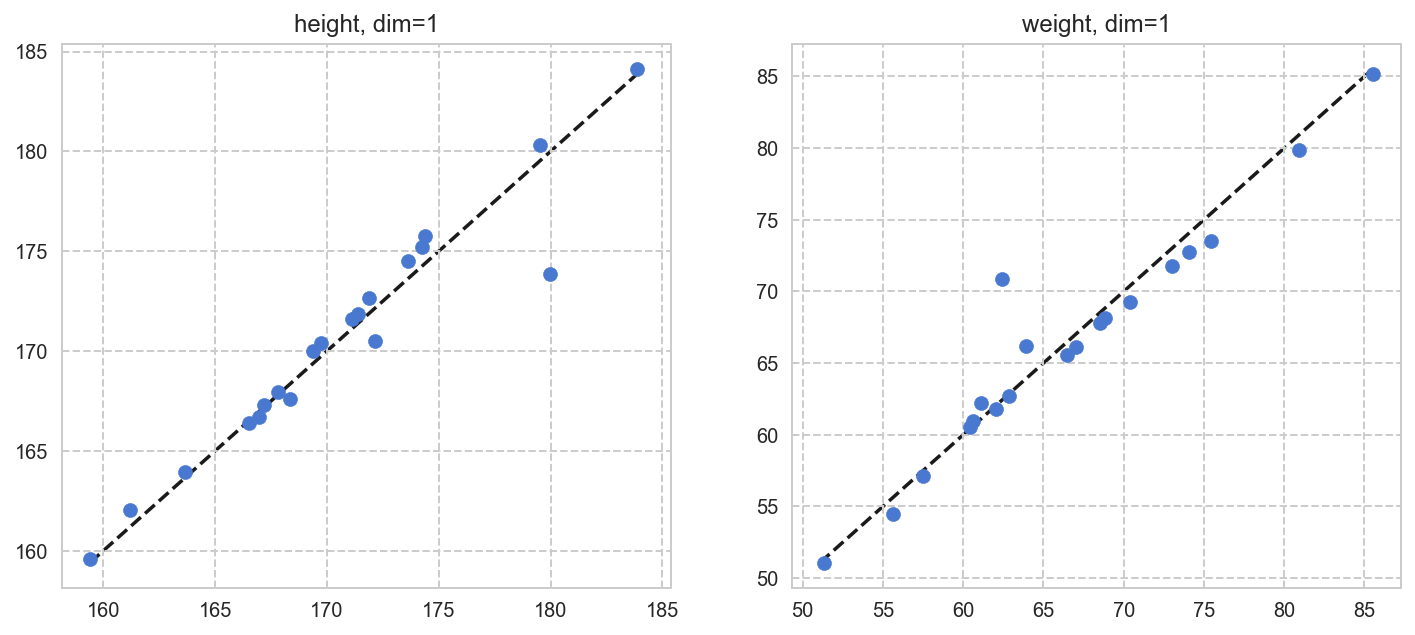

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(df_reduced_compared.height_original, df_reduced_compared.height_reduced)
_min = np.min([df_reduced_compared.height_original, df_reduced_compared.height_reduced])
_max = np.max([df_reduced_compared.height_original, df_reduced_compared.height_reduced])
plt.plot([_min,_max],[_min, _max], "k--", zorder=-1)
plt.title("height, dim=1")

plt.subplot(122)
plt.scatter(df_reduced_compared.weight_original, df_reduced_compared.weight_reduced)
_min = np.min([df_reduced_compared.weight_original, df_reduced_compared.weight_reduced])
_max = np.max([df_reduced_compared.weight_original, df_reduced_compared.weight_reduced])
plt.plot([_min,_max],[_min, _max], "k--", zorder=-1)
plt.title("weight, dim=1")


In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA()
pca.fit_transform(X)

array([[-0.03061629,  0.39168401],
       [ 3.21881662, -0.06161761],
       [ 2.30890305, -0.18298586],
       [ 0.92250994, -0.20656696],
       [-0.63525299, -0.02781596],
       [ 1.22557943, -0.32862624],
       [ 0.29919844, -0.11675921],
       [ 0.23842679, -0.12267553],
       [-0.14263238, -0.14888932],
       [ 1.0895789 , -0.22120627],
       [ 0.49211739, -0.19297421],
       [-1.59277815, -0.06822863],
       [-1.00243911,  0.02498401],
       [-2.62773183, -0.04550305],
       [-0.78499003, -0.035272  ],
       [-0.72213262,  0.18529447],
       [-2.04634302, -0.20294692],
       [-0.04833467, -0.15744535],
       [ 0.77101965,  1.45731121],
       [-0.93289913,  0.06023941]])

# PCAのcomponents_と、SVDのVの同値性の確認

符号が反転しているが、それ以外は同値

In [24]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [25]:
V

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

# PCA寄与度と、SVD特異値の関係の整合性確認

In [26]:
d2 = d**2
svd_explained_variance_ratio_ = d2/np.sum(d2)
svd_explained_variance_ = d2/(X.shape[0]-1)

In [27]:
pca.explained_variance_, svd_explained_variance_

(array([ 1.96234493,  0.14291823]), array([ 1.96234493,  0.14291823]))

In [28]:
pca.explained_variance_ratio_, svd_explained_variance_ratio_

(array([ 0.93211384,  0.06788616]), array([ 0.93211384,  0.06788616]))

# V.T \* D \* D \* Vと X.T \* X の同値性の確認

In [29]:
np.dot(np.dot(V.T, np.dot(D[:2,:2], D[:2,:2])),V)

array([[ 20.        ,  17.28455368],
       [ 17.28455368,  20.        ]])

In [30]:
np.dot(X.T, X)

array([[ 20.        ,  17.28455368],
       [ 17.28455368,  20.        ]])